## Credentials

github: gozelalmazovna

You can change the code however you want, have fun!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Question 1: Generating images

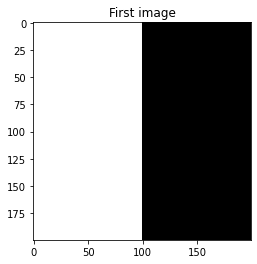

In [2]:
img = np.ones((200,200,1), np.uint8)*255
img = cv2.rectangle(img, (100,0), (200,200), (0,0,0),-1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('First image')
plt.show()

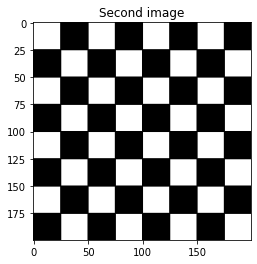

In [3]:
img2 = np.ones((200,200,1), np.uint8)*255
for k in range(0,200,50):
    for i in range(25,200,50):
            img2 = cv2.rectangle(img2, (i,k), (i+25,k+25), (0,0,0),-1)
for b in range(25,200,50):
    for a in range(0,200,50):
        img2 = cv2.rectangle(img2, (a,b), (a+25,b+25), (0,0,0),-1)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Second image')
plt.show()

### Question 3: Show the histogram of two images

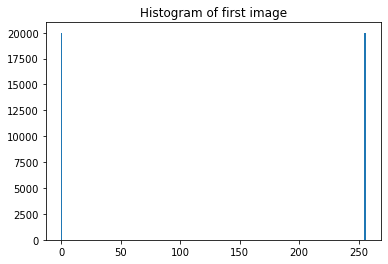

In [4]:
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram of first image')
plt.show()

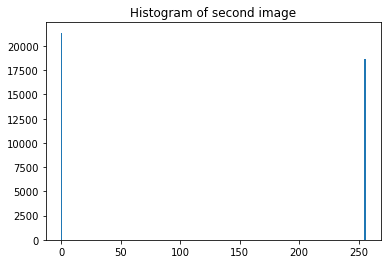

In [5]:
plt.hist(img2.ravel(),256,[0,256])
plt.title('Histogram of second image')
plt.show()

### Question 4: Use Gaussian smoothing filter
As can be seen from the simulations below, Gaussian smoothing depends on the size of the mask. As the size of the mask increases blurring also increases.

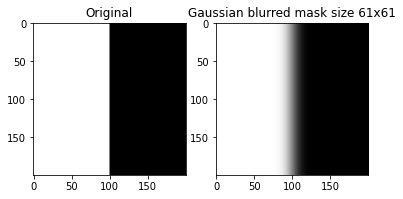

In [6]:
blur1 = cv2.GaussianBlur(img,(61,61),0)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(cv2.cvtColor(blur1,cv2.COLOR_BGR2RGB))
plt.title('Gaussian blurred mask size 61x61')
plt.show()

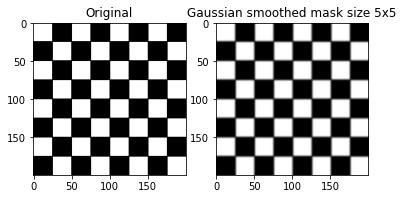

In [7]:
blur2 = cv2.GaussianBlur(img2,(5,5),0)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.title('Gaussian smoothed mask size 5x5')
plt.show()

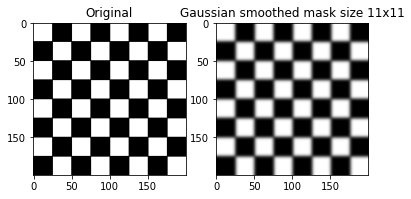

In [8]:
blur3 = cv2.GaussianBlur(img2,(11,11),0)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(cv2.cvtColor(blur3,cv2.COLOR_BGR2RGB))
plt.title('Gaussian smoothed mask size 11x11')
plt.show()

### Question 5. Histogram of smoothed images

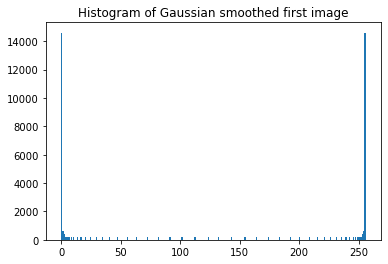

In [9]:
plt.hist(blur1.ravel(),256,[0,256])
plt.title('Histogram of Gaussian smoothed first image')
plt.show()

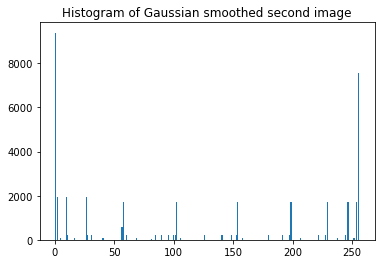

In [10]:
plt.hist(blur3.ravel(),256,[0,256])
plt.title('Histogram of Gaussian smoothed second image')
plt.show()

### Question 6. DFT and frequency content of images

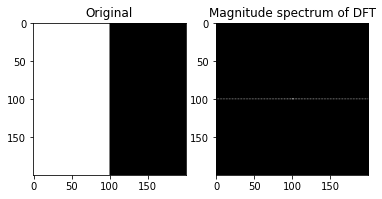

In [11]:
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(1+cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('Magnitude spectrum of DFT')
plt.show()

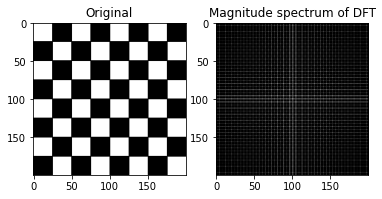

In [12]:
dft2 = cv2.dft(np.float32(img2), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0],dft_shift2[:,:,1]))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122)
plt.imshow(magnitude_spectrum2,cmap = 'gray')
plt.title('Magnitude spectrum of DFT')
plt.show()

### Question 7. Use ideal lowpass filter and work in frequency domain
Again as was the case in Gaussian filter, blurring or smoothing depends on the size of the mask. Smoothing increases with the size of the mask.

Text(0.5, 1.0, 'Magnitude spectrum of smoothed image')

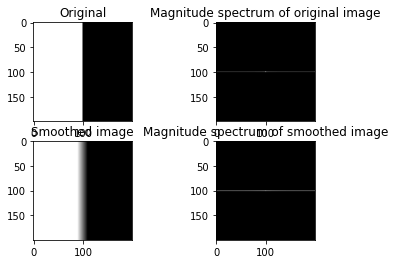

In [14]:
lowpass1 = cv2.blur(img,(21,21))
dft_lowpass1 = cv2.dft(np.float32(lowpass1), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_lowpass1 = np.fft.fftshift(dft_lowpass1)
magnitude_spectrum_lowpass1 = 20*np.log(1+cv2.magnitude(dft_shift_lowpass1[:,:,0],dft_shift_lowpass1[:,:,1]))
fig,axs = plt.subplots(2,2)
axs[0,0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axs[0,0].set_title('Original')
axs[0,1].imshow(magnitude_spectrum,cmap = 'gray')
axs[0,1].set_title('Magnitude spectrum of original image')
axs[1,0].imshow(cv2.cvtColor(lowpass1,cv2.COLOR_BGR2RGB))
axs[1,0].set_title('Smoothed image')
axs[1,1].imshow(magnitude_spectrum_lowpass1,cmap='gray')
axs[1,1].set_title('Magnitude spectrum of smoothed image')

Text(0.5, 1.0, 'Magnitude spectrum of smoothed image')

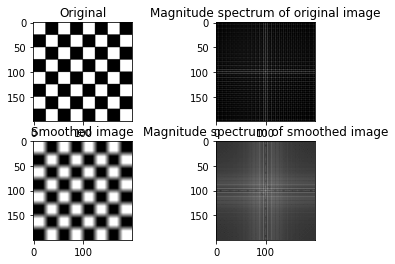

In [15]:
lowpass2 = cv2.blur(img2,(11,11))
dft_lowpass2 = cv2.dft(np.float32(lowpass2), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_lowpass2 = np.fft.fftshift(dft_lowpass2)
magnitude_spectrum_lowpass2 = 20*np.log(cv2.magnitude(dft_shift_lowpass2[:,:,0],dft_shift_lowpass2[:,:,1]))
fig2,axs2 = plt.subplots(2,2)
axs2[0,0].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
axs2[0,0].set_title('Original')
axs2[0,1].imshow(magnitude_spectrum2,cmap = 'gray')
axs2[0,1].set_title('Magnitude spectrum of original image')
axs2[1,0].imshow(cv2.cvtColor(lowpass2,cv2.COLOR_BGR2RGB))
axs2[1,0].set_title('Smoothed image')
axs2[1,1].imshow(magnitude_spectrum_lowpass2,cmap='gray')
axs2[1,1].set_title('Magnitude spectrum of smoothed image')